<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 40px;'>🚀</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>TRM Extra Mile | Data Scientist</span>
</div>
<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-weight: normal; font-size: 19px; color: #F;'>Data Analysis</span>
</div>

<br><br>

<div style='color: #2C4C65; text-align: center; font-size: 28px; font-weight: bold'>
  <p>
    Content
  </p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Impact of the problem in 2016</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>What's the main objective</p>
</div>
<div style='text-align: center; font-size: 20px;'>
  <span style='font-size: 20px;'>✅</span>
  <span>Why a ML model should do the job</p>
</div>

In [1]:
import pandas as pd
import numpy as np
import os, sys

import seaborn as sns
from matplotlib import pyplot as plt

sys.path.insert(0, os.path.abspath(".."))

# Heist Bitcoin analisys
df = pd.read_csv('../data/bronze_data.csv')
df.drop(['Unnamed: 0','str_day'],axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1865631 entries, 0 to 1865630
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   address         object 
 1   year            int64  
 2   day             int64  
 3   length          int64  
 4   weight          float64
 5   count           int64  
 6   looped          int64  
 7   neighbors       int64  
 8   income          float64
 9   label           object 
 10  date_operation  object 
 11  whichDayWeek    int64  
 12  target          int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 185.0+ MB


In [2]:
{
    'count':'contagem de operações agruapadas nas últimas 24 horas',
    'income':'quantidade recebida em satoshis (1 BTC = 100M satoshis)',
    'weight':'Quantidade de contas que estão enviando dinheiro para esse endereço final, quanto maior o weight, maior a quantidade de endereços de input, o que é ruim (Inputs/ValorBTCMovimentado)',
    'neighbors':'Quantidade de endereços que interagiram com esse endereço nas ultimas 24 horas (Tanto que enviaram quanto que receberam dinheiro desse endereço)',
    'looped':'Quantidade de endereços anteriores que esses BTCs foram divididos para então mergear nesse endereço atual (Essa quebra é feita para tentar atrapalhar o rastreio da operação)',
    'lenght':'Quantidade de steps individuais de cada BTC transferido até chegar no endereço final [Diferente do Looped, porque no Looped ele pega a quantidade de endereços anteriores que foram utilizados para mergear no endereço final]'
}

{'count': 'contagem de operações agruapadas nas últimas 24 horas',
 'income': 'quantidade recebida em satoshis (1 BTC = 100M satoshis)',
 'weight': 'Quantidade de contas que estão enviando dinheiro para esse endereço final, quanto maior o weight, maior a quantidade de endereços de input, o que é ruim (Inputs/ValorBTCMovimentado)',
 'neighbors': 'Quantidade de endereços que interagiram com esse endereço nas ultimas 24 horas (Tanto que enviaram quanto que receberam dinheiro desse endereço)',
 'looped': 'Quantidade de endereços anteriores que esses BTCs foram divididos para então mergear nesse endereço atual (Essa quebra é feita para tentar atrapalhar o rastreio da operação)',
 'lenght': 'Quantidade de steps individuais de cada BTC transferido até chegar no endereço final [Diferente do Looped, porque no Looped ele pega a quantidade de endereços anteriores que foram utilizados para mergear no endereço final]'}

<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Analysing 2017 fraud</span>
</div>

<br>

In [2]:
df['BTC'] = df.apply(lambda x: x['income']/1_000_000, axis=1)
df.loc[df['target'] == 1, 'BTC'].sum()

31865613.344452

In [3]:
df.dtypes

address            object
year                int64
day                 int64
length              int64
weight            float64
count               int64
looped              int64
neighbors           int64
income            float64
label              object
date_operation     object
whichDayWeek        int64
target              int64
BTC               float64
dtype: object

In [4]:
df_plot = df.query("target == 1").groupby(['year']).agg(
    sum_btc_target=('BTC','sum'),
    mean_btc_target=('BTC','mean')
).reset_index().sort_values(by='year', ascending=False).applymap(lambda x: f"{x:0.3f}")

df_plot['year'] = df_plot['year'].astype('float').astype('int')
df_plot['sum_btc_target'] = df_plot['sum_btc_target'].astype('float').astype('int')
df_plot['mean_btc_target'] = df_plot['mean_btc_target'].astype('float').astype('int')

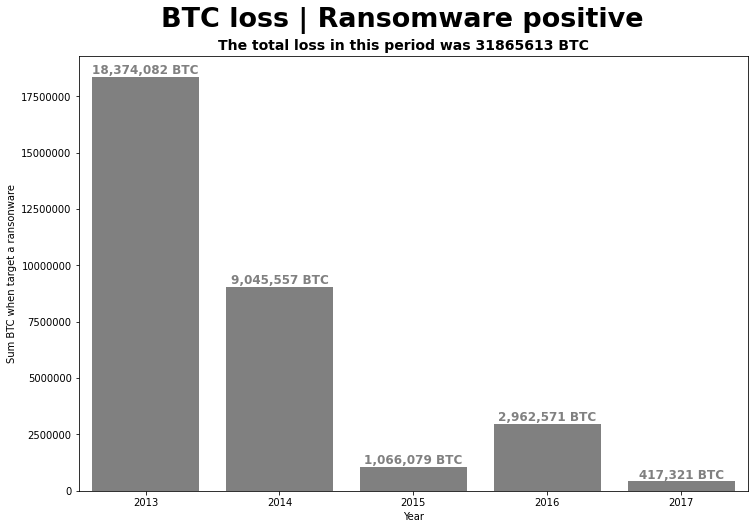

In [5]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=df_plot, x='year', y='sum_btc_target', color='grey')

plt.suptitle('BTC loss | Ransomware positive', fontsize=27, fontweight='bold', y=0.965)
plt.title(f'The total loss in this period was {31_865_613} BTC', x=0.485, fontweight='bold', fontsize=14)
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f} BTC',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='grey')
    
plt.ylabel('Sum BTC when target a ransonware')
plt.xlabel('Year')
plt.show()

In [6]:
df_plot = df.query("target == 1").groupby(['address']).agg(
    sum_btc_target=('BTC','sum'),
    min_year=('year','min'),
    sum_count=('count','sum'),
    sum_neigh=('neighbors','sum')
).reset_index()

sum_neigh = df_plot['sum_neigh'].sum()
sum_count = df_plot['sum_count'].sum()

print(f'Sum of interations {sum_neigh}')
print(f'Sum of transactions {sum_count}')

Sum of interations 84178
Sum of transactions 24825683


<br><br>

<div style='text-align: center; font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;'>
  <span style='font-size: 30px;'>📊</span>
  <span style='font-weight: bold; font-size: 32px; color: #2C4C65;'>Insights of the problem</span>
</div>

<br>

#### We know bitcoin transactions can't be cancelled and it's hard to track it down who it's responsible for each transaction. But it's important to identify possible addresses that are not safe to transfer. <br>

* A large amount of BTC is falling into the hands of criminals.
* We can't cancel the transaction, but we can warn anyone trying to send BTC to an address that has been identified as criminal.
* Following some research, ransomware detection can take years/months to conclude; this algorithm can help speed up the process.
* We can contribute by saving people from both malicious and complex fraudulent transactions.
* The probability of fewer fraudulent operations taking place may be due to new ways of detecting ransomware operations.

In [9]:
# Quanto tempo antes o modelo consegue identificar um endereço como ransomware em comparação com a base original?
# Quais famílias de ransomware foram mais capturadas pelo modelo?
# Qual a taxa de falsos positivos (endereços 'white' que o modelo identificou como ransomware)?
# "Quantos endereços meu modelo identificou a mais do que a regra atual?"
# "Quantas transações pertencem a um endereço que previamente meu modelo identificou como ransomware?"